# linear Regression
The main aim is to develop a machine learning mode using lonear regression to 
accurately predict the box office revenue of movies based on various features.
the model will be trained on a dataset

## Specific objectives:
 1. Build a predictive model thata can estimate the expected revnue of movie.
 2. Provide insights into which features are most influential in determining box office success.
 3. Compare linesr regression performance with more models

### 1. Step 1
import the necessary libraries and datasets e.g. pandas, numpy, sklearn, matplotlib, seaborn
### 2. Step 2
Processing and Modelling
 - train_test split
 - LabelEncoder for categorical features
 - StandardScaler for numerical features: scale features for better performance
 - CountVectorizer for text features: convert text data into numerical format
 - Metrics: offers tools for evaluating model performance

### Advanced modelling
xgboost- a high performance gradient boosting algorithm used for classification and regression tasks
    
### Utilities
warnings.filterwarnings("ignore") - to suppress warnings during execution    

In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings("ignore")

In [617]:
df = pd.read_csv('../files/boxoffice.csv')
df.tail

<bound method NDFrame.tail of               title  domestic_revenue  world_revenue   distributor  \
0      The Avengers           6026491     1274885664  Warner Bros.   
1           Titanic         169411543     1132871091        Disney   
2     Jurassic Park         107836098      583329845          Sony   
3            Avatar          51433697     1225323391        Disney   
4     The Lion King         142791649      604140729  Warner Bros.   
...             ...               ...            ...           ...   
2689          X-Men          38153242       47601900        Disney   
2690     The Matrix          63305093      252473529        Disney   
2691   Forrest Gump         271758510      524896297        Disney   
2692           Jaws         268259149      791515453        Disney   
2693   Interstellar         158336835       77904664     Universal   

      opening_revenue  opening_theaters     budget   MPAA     genres  \
0           163620146               253  174687337      R

In [618]:
#checking the dataset size
print("Dataset size:", df.shape)

Dataset size: (2694, 10)


In [619]:
# checking data types
print("Data types:\n", df.dtypes)

Data types:
 title               object
domestic_revenue     int64
world_revenue        int64
distributor         object
opening_revenue      int64
opening_theaters     int64
budget               int64
MPAA                object
genres              object
release_days         int64
dtype: object


In [620]:
df.info

<bound method DataFrame.info of               title  domestic_revenue  world_revenue   distributor  \
0      The Avengers           6026491     1274885664  Warner Bros.   
1           Titanic         169411543     1132871091        Disney   
2     Jurassic Park         107836098      583329845          Sony   
3            Avatar          51433697     1225323391        Disney   
4     The Lion King         142791649      604140729  Warner Bros.   
...             ...               ...            ...           ...   
2689          X-Men          38153242       47601900        Disney   
2690     The Matrix          63305093      252473529        Disney   
2691   Forrest Gump         271758510      524896297        Disney   
2692           Jaws         268259149      791515453        Disney   
2693   Interstellar         158336835       77904664     Universal   

      opening_revenue  opening_theaters     budget   MPAA     genres  \
0           163620146               253  174687337     

In [621]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,7.673272e+07,152572473.5,2.247314e+08,2.998107e+08
world_revenue,2694.0,7.719177e+08,4.284414e+08,3261301.0,3.991135e+08,766555142.5,1.143920e+09,1.499310e+09
opening_revenue,2694.0,9.971321e+07,5.721762e+07,138569.0,5.033848e+07,99814175.0,1.489805e+08,1.999336e+08
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1.161000e+03,2271.5,3.392250e+03,4.499000e+03
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,7.861876e+07,156256716.0,2.274832e+08,2.998597e+08
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,4.700000e+01,91.0,1.350000e+02,1.790000e+02


In [622]:
# Removing unnecessary columns
# 'world_revenue' and 'opening_revenue' are not needed for the model
to_remove = ['world_revenue', 'opening_revenue']
df.drop(to_remove, axis=1, inplace=True)

In [623]:
# Removing null values by calculating the percentage of null values in each column
# dividing by shape means the number of rows
print("Percentage of null values in each column:")
df.isnull().mean()*100 / df.shape[0]

Percentage of null values in each column:


title               0.0
domestic_revenue    0.0
distributor         0.0
opening_theaters    0.0
budget              0.0
MPAA                0.0
genres              0.0
release_days        0.0
dtype: float64

In [624]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
domestic_revenue,2694.0,1.508539e+08,8.579997e+07,827765.0,76732721.25,152572473.5,2.247314e+08,299810741.0
opening_theaters,2694.0,2.263039e+03,1.298559e+03,10.0,1161.00,2271.5,3.392250e+03,4499.0
budget,2694.0,1.537996e+08,8.557624e+07,5197977.0,78618761.50,156256716.0,2.274832e+08,299859703.0
release_days,2694.0,9.089755e+01,5.089404e+01,1.0,47.00,91.0,1.350000e+02,179.0


In [625]:
# Handling the null value columns
df.drop('budget', axis=1, inplace=True)

for col in ['MPAA', 'genres']:
	df[col] = df[col].fillna(df[col].mode()[0])

df.dropna(inplace=True)

df.isnull().sum().sum()

np.int64(0)

In [626]:
df['domestic_revenue'] = df['domestic_revenue'].astype(str).str[1:]

for col in ['domestic_revenue', 'opening_theaters', 'release_days']:
    df[col] = df[col].astype(str).str.replace(',', '')

    # Selecting rows with no null values
    # in the columns on which we are iterating.
    temp = (~df[col].isnull())
    df[temp][col] = df[temp][col].convert_dtypes(float)

    df[col] = pd.to_numeric(df[col], errors='coerce')

In [627]:
# Displaying the DataFrame as a string
display(df.to_string())
df.head(100)

'                         title  domestic_revenue   distributor  opening_theaters   MPAA     genres  release_days\n0                 The Avengers             26491  Warner Bros.               253      R  Animation            16\n1                      Titanic          69411543        Disney               122      G     Action           103\n2                Jurassic Park           7836098          Sony              3826  NC-17     Horror            89\n3                       Avatar           1433697        Disney              3868      G     Horror            85\n4                The Lion King          42791649  Warner Bros.              2934      R     Comedy           158\n5                    Star Wars          83757629     Universal              1216      R     Comedy           154\n6                       Frozen           7740374          Sony              4472  NC-17     Action            47\n7                    Inception          85260781     Paramount              3548  PG-13

,title,domestic_revenue,distributor,opening_theaters,MPAA,genres,release_days
0,The Avengers,26491,Warner Bros.,253,R,Animation,16
1,Titanic,69411543,Disney,122,G,Action,103
2,Jurassic Park,7836098,Sony,3826,NC-17,Horror,89
3,Avatar,1433697,Disney,3868,G,Horror,85
4,The Lion King,42791649,Warner Bros.,2934,R,Comedy,158
...,...,...,...,...,...,...,...
95,Jurassic Park,51538541,Warner Bros.,2774,R,Drama,100
96,Avatar,23828477,Sony,4166,NC-17,Horror,48
97,The Lion King,14776212,Paramount,2212,R,Thriller,88
98,Star Wars,29275123,Disney,3531,PG-13,Comedy,138


(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'R'),
  Text(1, 0, 'PG-13'),
  Text(2, 0, 'NC-17'),
  Text(3, 0, 'G'),
  Text(4, 0, 'PG')])

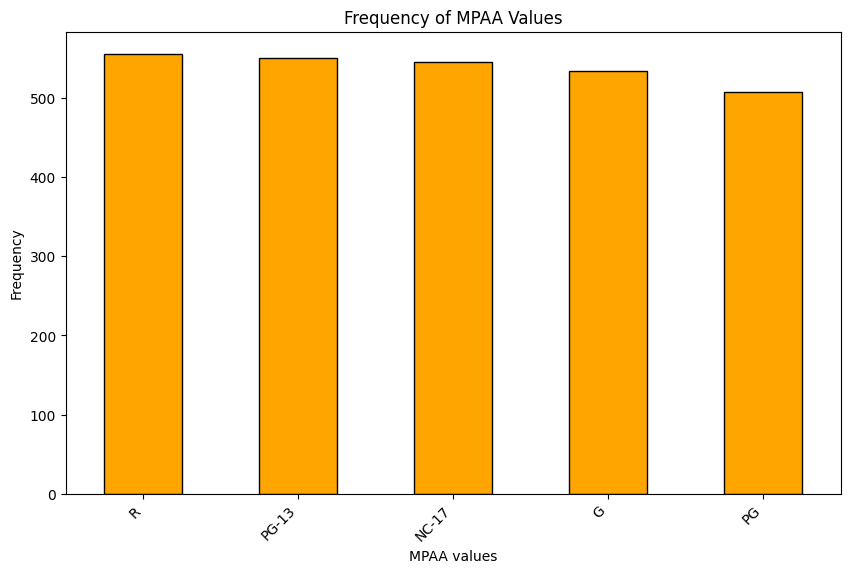

In [628]:
app_counts = df['MPAA'].value_counts()

# plot bar graph of MPAA counts
plt.figure(figsize=(10, 6))
app_counts.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Frequency of MPAA Values')
plt.xlabel('MPAA values')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') 

In [629]:
df.groupby('MPAA')['domestic_revenue'].mean()

MPAA
G        3.426099e+07
NC-17    3.452006e+07
PG       3.697347e+07
PG-13    3.510989e+07
R        3.670206e+07
Name: domestic_revenue, dtype: float64

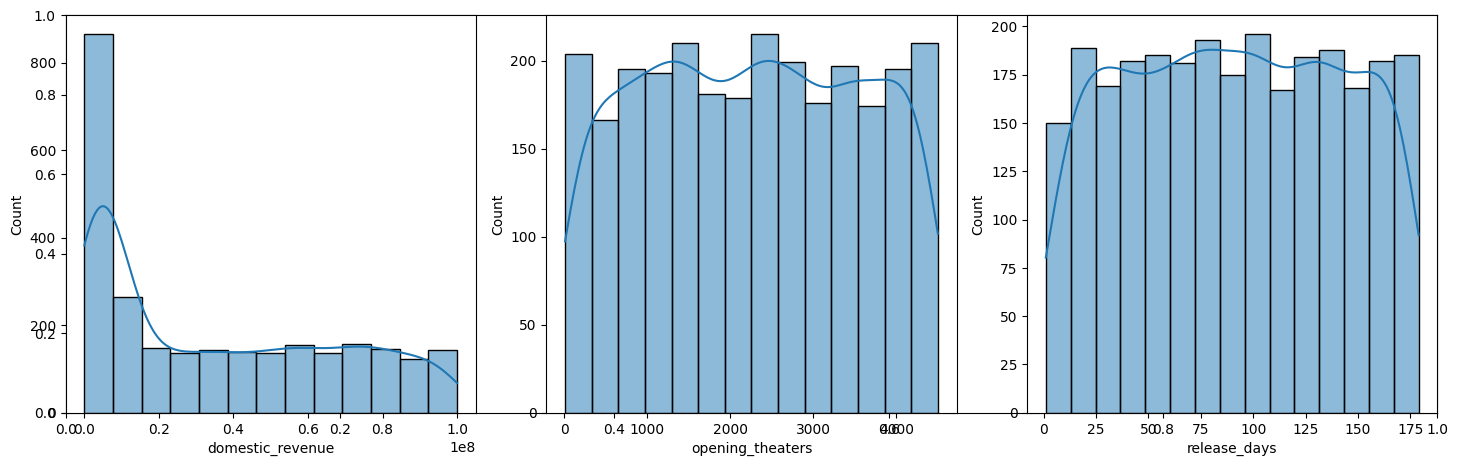

In [630]:
plt.subplots(figsize=(15, 5))

features = ['domestic_revenue', 'opening_theaters', 'release_days']
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

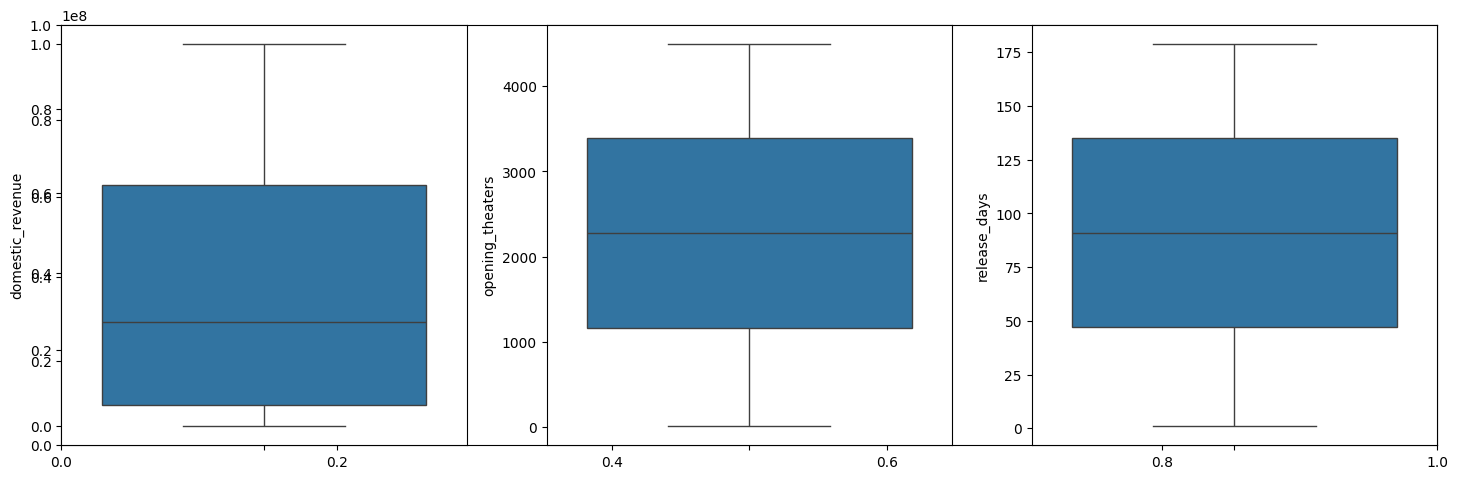

In [631]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sns.boxplot(df[col])
plt.tight_layout()
plt.show()

In [632]:
for col in features:
  df[col] = df[col].apply(lambda x: np.log10(x))

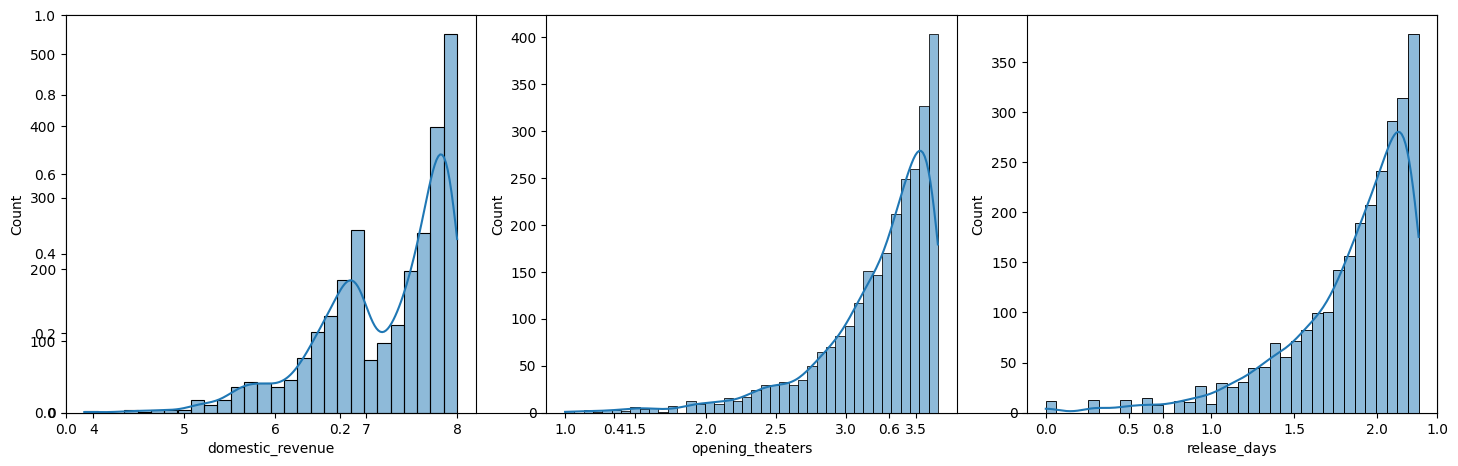

In [633]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(features):
	plt.subplot(1, 3, i+1)
	sns.histplot(df[col], kde=True)
plt.tight_layout()
plt.show()

In [634]:
vectorizer = CountVectorizer()
vectorizer.fit(df['genres'])
features = vectorizer.transform(df['genres']).toarray()

genres = vectorizer.get_feature_names_out()
for i, name in enumerate(genres):
	df[name] = features[:, i]

df.drop('genres', axis=1, inplace=True)

In [635]:
removed = 0
# Check if 'action' and 'western' columns exist before slicing
if 'action' in df.columns and 'western' in df.columns:
    for col in df.loc[:, 'action':'western'].columns:

        # Removing columns having more
        # than 95% of the values as zero.
        if (df[col] == 0).mean() > 0.95:
            removed += 1
            df.drop(col, axis=1, inplace=True)

print(removed)
print(df.shape)

0
(2694, 12)


In [636]:
for col in ['distributor', 'MPAA']:
	le = LabelEncoder()
	df[col] = le.fit_transform(df[col])

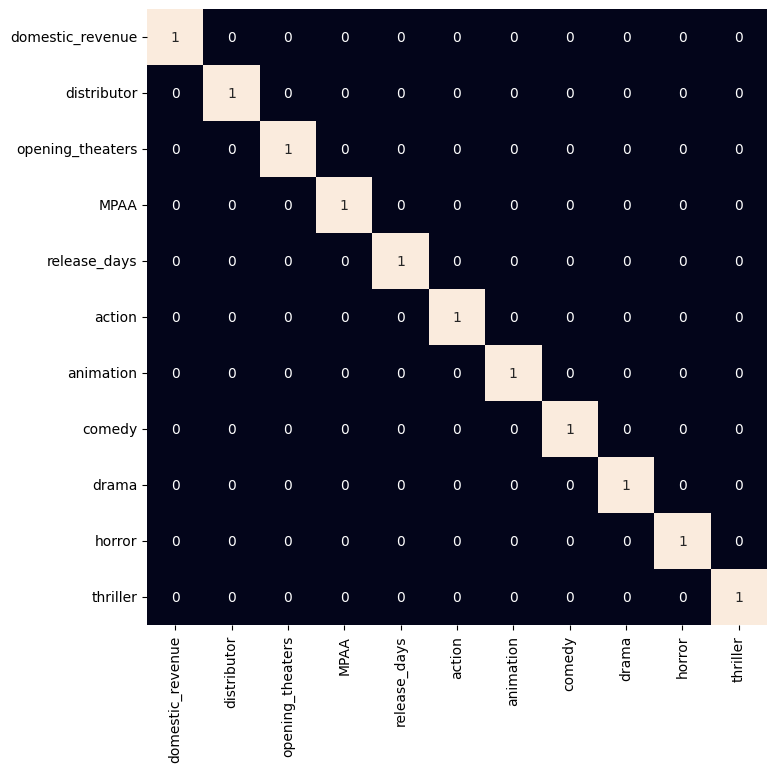

In [637]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.select_dtypes(include=np.number).corr() > 0.8,
            annot=True,
            cbar=False)
plt.show()

In [638]:
# Preparing the data for model training and validation 
# we will drop the 'title' and 'domestic_revenue' columns
# we shall split the data into 90% training and 10% validation sets to ensure model performance evaluation
# and to prevent overfitting during training.

features = df.drop(['title', 'domestic_revenue'], axis=1)
target = df['domestic_revenue'].values

X_train, X_val, Y_train, Y_val = train_test_split(features, target,test_size=0.1,random_state=22)
X_train.shape, X_val.shape

((2424, 10), (270, 10))

In [639]:
# Normalizing the features for stable and fast training.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [640]:
from sklearn.metrics import mean_absolute_error as mae
model = XGBRegressor()
model.fit(X_train, Y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [641]:
#Evaluation of the model

train_preds = model.predict(X_train)
print('Training Error : ', mae(Y_train, train_preds))

val_preds = model.predict(X_val)
print('Validation Error : ', mae(Y_val, val_preds))
print()

Training Error :  0.2104541861999253
Validation Error :  0.6358190127903746

